                                SALES PREDICTION USING PYTHON TASK 5

                                Importing some libraries

In [72]:
# Importing some libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [73]:
# read csv file
df =pd.read_csv("Advertising.csv")

In [74]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [75]:
# Assuming you have a DataFrame called 'df'
sampled_df = df.sample(8)


In [76]:
df.sample

<bound method NDFrame.sample of      Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [77]:
# for coordinate of shape
df.shape

(200, 5)

In [78]:
# for null value
df.isnull()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [79]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [80]:
#search the columns in dataframe
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [81]:
#for deleting column Newspaper
df.drop(columns=["Newspaper"], inplace=True)


In [82]:
df 

,Unnamed: 0,TV,Radio,Sales
0,1,230.1,37.8,22.1
1,2,44.5,39.3,10.4
2,3,17.2,45.9,9.3
3,4,151.5,41.3,18.5
4,5,180.8,10.8,12.9
...,...,...,...,...
195,196,38.2,3.7,7.6
196,197,94.2,4.9,9.7
197,198,177.0,9.3,12.8
198,199,283.6,42.0,25.5


In [83]:
df.shape

(200, 4)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Sales       200 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 6.4 KB


In [85]:
df.size

800

In [86]:
df.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Sales         float64
dtype: object

In [87]:
df.describe()

,Unnamed: 0,TV,Radio,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,14.022500
std,57.879185,85.854236,14.846809,5.217457
min,1.000000,0.700000,0.000000,1.600000
25%,50.750000,74.375000,9.975000,10.375000
50%,100.500000,149.750000,22.900000,12.900000
75%,150.250000,218.825000,36.525000,17.400000
max,200.000000,296.400000,49.600000,27.000000


In [88]:
duplicates = df.duplicated()


In [89]:
df.duplicated().sum()

0

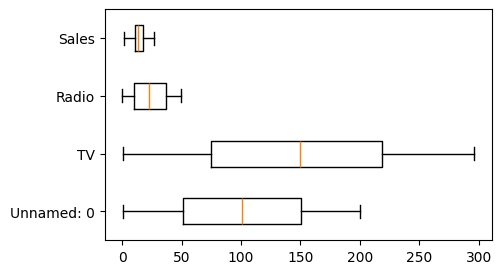

In [90]:
plt.figure(figsize=[5,3])
plt.boxplot(df.values,vert=False,data=df,labels=df.columns)
plt.show()

                                                CREATING HISTOGRAMS

C:\python 3.11\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\python 3.11\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='TV', ylabel='Count'>

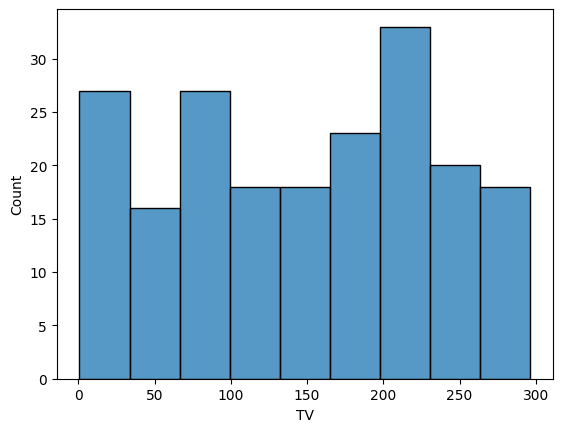

In [91]:
#create histogram of TV
sns.histplot(df['TV'])

C:\python 3.11\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\python 3.11\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Radio', ylabel='Count'>

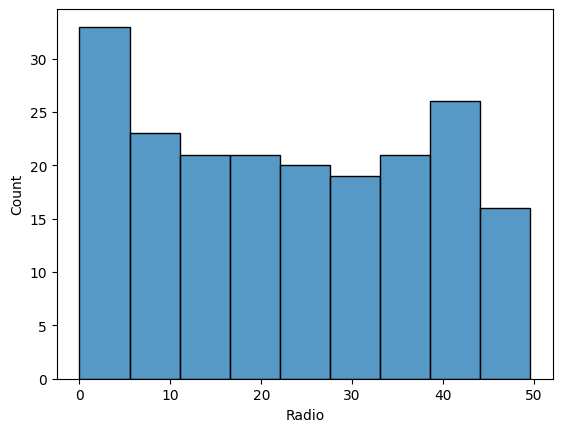

In [92]:
#Create histogram og Radio
sns.histplot(df['Radio'])

C:\python 3.11\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\python 3.11\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Sales', ylabel='Count'>

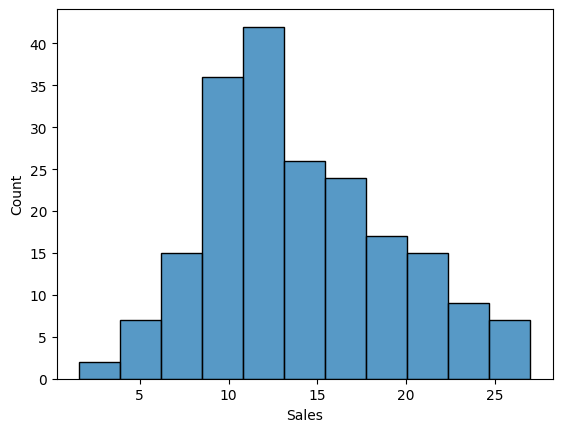

In [93]:
#create histogram of Sales
sns.histplot(df['Sales'])

                                Analysing data by distplot graph

C:\Users\hp\AppData\Local\Temp\ipykernel_7580\2532850109.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Radio'])
C:\python 3.11\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\python 3.11\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Radio', ylabel='Density'>

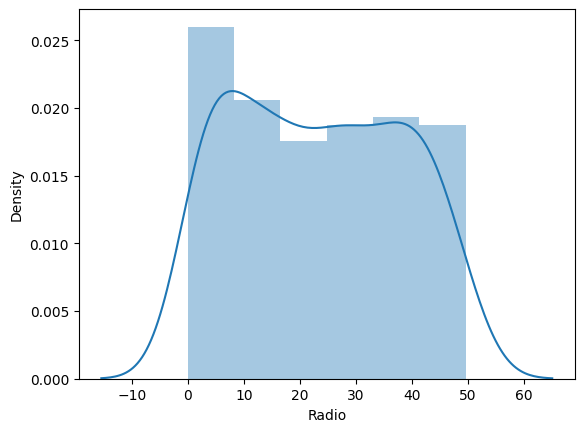

In [94]:
sns.distplot(df['Radio'])

C:\Users\hp\AppData\Local\Temp\ipykernel_7580\2926773584.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TV'])
C:\python 3.11\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\python 3.11\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='TV', ylabel='Density'>

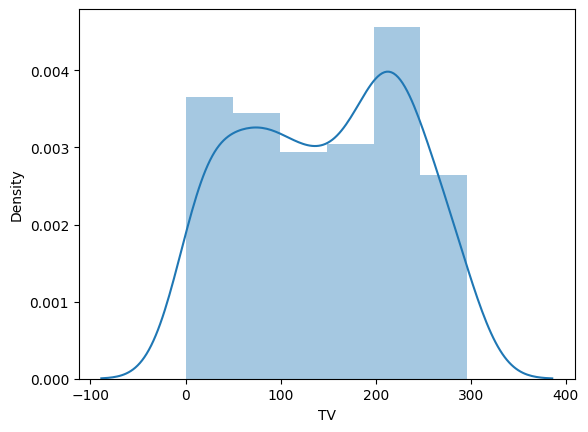

In [95]:
sns.distplot(df['TV'])

                               Analysing data by pairplot graph


C:\python 3.11\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\python 3.11\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\python 3.11\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\python 3.11\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\python 3.11\L

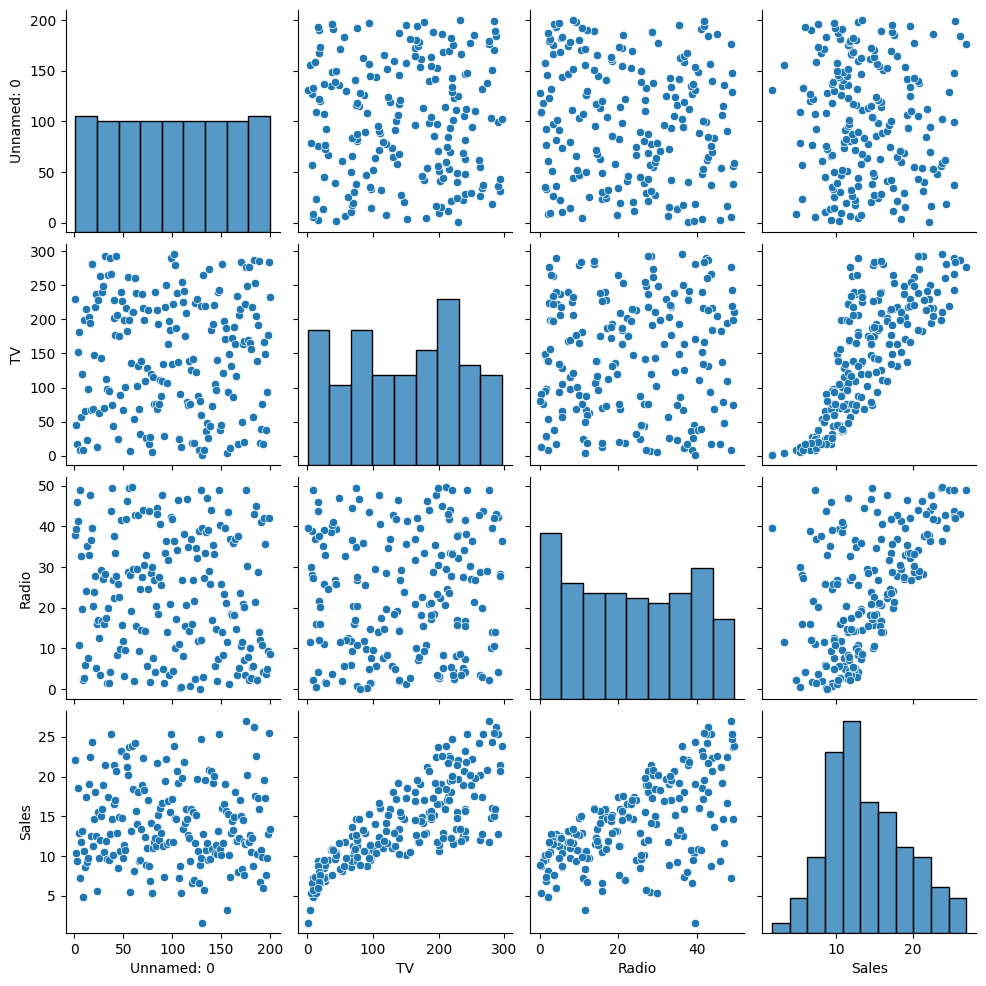

In [96]:
sns.pairplot(df)

<Axes: >

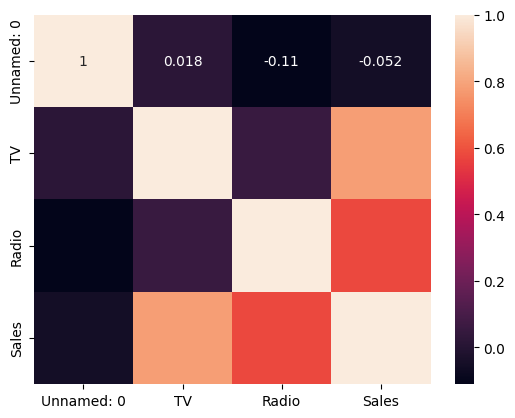

In [115]:
sns.heatmap(df.corr(),annot=True)

                        Train the model with the Advertising data set

In [116]:
x=df.iloc[:,:-1]
x

,Unnamed: 0,TV,Radio
0,1,230.1,37.8
1,2,44.5,39.3
2,3,17.2,45.9
3,4,151.5,41.3
4,5,180.8,10.8
...,...,...,...
195,196,38.2,3.7
196,197,94.2,4.9
197,198,177.0,9.3
198,199,283.6,42.0


In [117]:
y=df.iloc[:,-1:]

In [118]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=50)

In [119]:
print(x.shape)
print(xtrain.shape)
print(xtest.shape)

(200, 3)
(140, 3)
(60, 3)


In [120]:
xtrain,ytrain

(     Unnamed: 0     TV  Radio
 114         115   78.2   46.8
 187         188  191.1   28.7
 76           77   27.5    1.6
 122         123  224.0    2.4
 142         143  220.5   33.2
 ..          ...    ...    ...
 132         133    8.4   27.2
 33           34  265.6   20.0
 109         110  255.4   26.9
 139         140  184.9   43.9
 176         177  248.4   30.2
 
 [140 rows x 3 columns],
      Sales
 114   14.6
 187   17.3
 76     6.9
 122   11.6
 142   20.1
 ..     ...
 132    5.7
 33    17.4
 109   19.8
 139   20.7
 176   20.2
 
 [140 rows x 1 columns])

In [121]:
xtest,ytest

(     Unnamed: 0     TV  Radio
 112         113  175.7   15.4
 165         166  234.5    3.4
 12           13   23.8   35.1
 73           74  129.4    5.7
 144         145   96.2   14.8
 20           21  218.4   27.7
 199         200  232.1    8.6
 8             9    8.6    2.1
 39           40  228.0   37.7
 88           89   88.3   25.5
 81           82  239.8    4.1
 197         198  177.0    9.3
 69           70  216.8   43.9
 160         161  172.5   18.1
 25           26  262.9    3.5
 99          100  135.2   41.7
 151         152  121.0    8.4
 23           24  228.3   16.9
 138         139   43.0   25.9
 159         160  131.7   18.4
 89           90  109.8   47.8
 82           83   75.3   20.3
 24           25   62.3   12.6
 174         175  222.4    3.4
 137         138  273.7   28.9
 83           84   68.4   44.5
 107         108   90.4    0.3
 34           35   95.7    1.4
 97           98  184.9   21.0
 167         168  206.8    5.2
 123         124  123.1   34.6
 157    

                                            Linear Regression

In [122]:
model = LinearRegression()

In [123]:
model.fit(xtrain,ytrain)

LinearRegression()

In [124]:
ypredict = model.predict(xtest)
ypredict

array([[14.00959883],
       [14.62218927],
       [10.36249757],
       [ 9.99730808],
       [10.13289253],
       [18.26154023],
       [15.48473605],
       [ 3.55146056],
       [20.57241987],
       [11.70093557],
       [14.95952228],
       [12.99099197],
       [21.1985642 ],
       [14.3803664 ],
       [15.91872995],
       [16.92582477],
       [10.13634163],
       [16.74249387],
       [ 9.64537759],
       [12.4938073 ],
       [16.83693235],
       [10.12026838],
       [ 8.05136048],
       [14.05115095],
       [21.17535051],
       [14.25531439],
       [ 7.16354214],
       [ 7.58039569],
       [15.47223302],
       [13.63715095],
       [15.05328762],
       [10.20050659],
       [11.65310558],
       [16.5294562 ],
       [ 6.59482794],
       [ 9.71358068],
       [13.12914424],
       [20.5900822 ],
       [ 9.14146678],
       [11.35181821],
       [ 7.35806127],
       [24.46106035],
       [ 9.74535352],
       [18.30296794],
       [16.5196029 ],
       [12

In [125]:
model.score(xtrain,ytrain)*100

90.23384036947967

In [126]:
model.score(xtest,ytest)*100

86.46964883872953

In [127]:
mean_squared_error(ytest,ypredict)

2.517838993643202

In [128]:
mean_absolute_error(ytest,ypredict)

1.2022450229399686

In [129]:
r2_score(ytest,ypredict)*100

86.46964883872953

In [130]:
r = np.sqrt(mean_squared_error(ytest,ypredict))
r

1.586769987629966

In [131]:
cv = KFold(n_splits=5,shuffle=True, random_state=0)
cv

KFold(n_splits=5, random_state=0, shuffle=True)

In [132]:
score=cross_val_score(model,x,y,cv=cv,n_jobs=-1)
finalscore=np.mean(score)
finalscore

0.8915806032420027